In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

bank = pd.DataFrame({
    "age": np.random.randint(18, 70, 100),
    "job": np.random.choice(["admin", "technician", "services", "management"], 100),
    "marital": np.random.choice(["single", "married", "divorced"], 100),
    "balance": np.random.randint(-2000, 5000, 100),
    "loan": np.random.choice(["yes", "no"], 100),
    "duration": np.random.randint(30, 400, 100)
})

bank.to_csv("bank.csv", index=False)
bank.head()


,age,job,marital,balance,loan,duration
0,56,admin,married,1643,no,293
1,69,admin,married,2976,yes,82
2,46,admin,divorced,49,yes,89
3,32,services,married,3423,no,137
4,60,admin,divorced,4397,yes,34


In [5]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,balance,loan,duration
0,56,admin,married,1643,no,293
1,69,admin,married,2976,yes,82
2,46,admin,divorced,49,yes,89
3,32,services,married,3423,no,137
4,60,admin,divorced,4397,yes,34


In [8]:
df.info()

obj_cols = df.select_dtypes(include="object").columns
obj_cols


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       100 non-null    int64 
 1   job       100 non-null    object
 2   marital   100 non-null    object
 3   balance   100 non-null    int64 
 4   loan      100 non-null    object
 5   duration  100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


Index(['job', 'marital', 'loan'], dtype='object')

In [9]:
for col in obj_cols:
    print(col, df[col].unique())


job ['admin' 'services' 'management' 'technician']
marital ['married' 'divorced' 'single']
loan ['no' 'yes']


In [10]:
df.isnull().sum()


,0
age,0
job,0
marital,0
balance,0
loan,0
duration,0


In [11]:
df_numeric = df.drop(columns=obj_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)
df_numeric.head()


,age,balance,duration
0,56,1643,293
1,69,2976,82
2,46,49,89
3,32,3423,137
4,60,4397,34


In [12]:
df2 = pd.read_csv("banknumericdata.csv")
df2.describe()


,age,balance,duration
count,100.000000,100.000000,100.000000
mean,43.350000,1655.680000,213.700000
std,14.904663,1901.331006,103.595318
min,19.000000,-1984.000000,30.000000
25%,31.750000,164.000000,129.000000
50%,42.000000,1784.000000,208.500000
75%,57.000000,3260.250000,298.750000
max,69.000000,4959.000000,399.000000


In [6]:
np.random.seed(42)

medical = pd.DataFrame({
    "Name": ["Student_" + str(i) for i in range(1, 51)],
    "Age": np.random.randint(18, 30, 50),
    "Score": np.random.choice([np.nan, 60, 70, 80, 90], 50),
    "Attendance": np.random.choice([np.nan, 0.80, 0.90, 0.95], 50)
})

medical.to_csv("medical_student.csv", index=False)
medical.head()


,Name,Age,Score,Attendance
0,Student_1,24,60.0,0.95
1,Student_2,21,80.0,0.95
2,Student_3,28,NaN,0.90
3,Student_4,25,80.0,0.90
4,Student_5,22,60.0,0.90


In [13]:
df = pd.read_csv("medical_student.csv")
df.head()

,Name,Age,Score,Attendance
0,Student_1,24,60.0,0.95
1,Student_2,21,80.0,0.95
2,Student_3,28,NaN,0.90
3,Student_4,25,80.0,0.90
4,Student_5,22,60.0,0.90


In [14]:
df.isnull().sum()


,0
Name,0
Age,0
Score,10
Attendance,12


In [15]:
df["Score"] = df["Score"].fillna(df["Score"].mean())
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].median())


In [16]:
df = df.drop_duplicates()
df


,Name,Age,Score,Attendance
0,Student_1,24,60.0,0.95
1,Student_2,21,80.0,0.95
2,Student_3,28,75.0,0.90
3,Student_4,25,80.0,0.90
4,Student_5,22,60.0,0.90
5,Student_6,24,60.0,0.90
6,Student_7,27,75.0,0.95
7,Student_8,20,60.0,0.90
8,Student_9,24,90.0,0.90
9,Student_10,28,60.0,0.90


In [7]:
np.random.seed(42)

titanic = pd.DataFrame({
    "Name": ["Person_" + str(i) for i in range(1, 200)],
    "Pclass": np.random.choice([1, 2, 3], 199),
    "Sex": np.random.choice(["male", "female"], 199),
    "Age": np.random.randint(1, 80, 199),
    "Fare": np.random.uniform(5, 100, 199),
    "Survived": np.random.choice([0, 1], 199),
    "Embarked": np.random.choice(["C", "Q", "S"], 199)
})

titanic.to_csv("titanic.csv", index=False)
titanic.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked
0,Person_1,3,female,61,10.081103,1,Q
1,Person_2,1,female,48,96.061442,1,C
2,Person_3,3,female,19,85.478599,1,Q
3,Person_4,3,male,4,38.715993,1,C
4,Person_5,1,female,35,95.896084,0,S


In [17]:
subset = titanic[["Name","Pclass","Sex","Age","Fare","Survived"]]
subset1 = subset[subset["Pclass"] == 1]
subset1["Fare"].agg(["mean","median","max","min"])


,Fare
mean,55.228710
median,56.861998
max,98.602175
min,8.070015


In [18]:
subset1["Age"].isnull().sum()

subset1 = subset1.dropna(subset=["Age"])


In [19]:
encoded = pd.get_dummies(titanic["Embarked"], prefix="Embarked")
titanic2 = pd.concat([titanic, encoded], axis=1)
titanic2 = titanic2.drop(columns=["Embarked"])
titanic2.head()


,Name,Pclass,Sex,Age,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,Person_1,3,female,61,10.081103,1,False,True,False
1,Person_2,1,female,48,96.061442,1,True,False,False
2,Person_3,3,female,19,85.478599,1,False,True,False
3,Person_4,3,male,4,38.715993,1,True,False,False
4,Person_5,1,female,35,95.896084,0,False,False,True


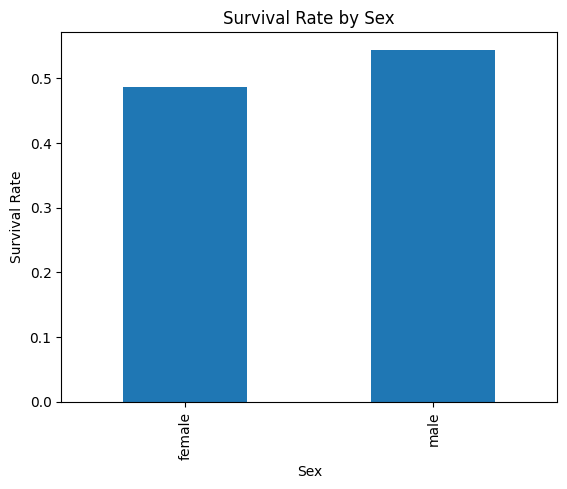

In [20]:
import matplotlib.pyplot as plt

titanic.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()


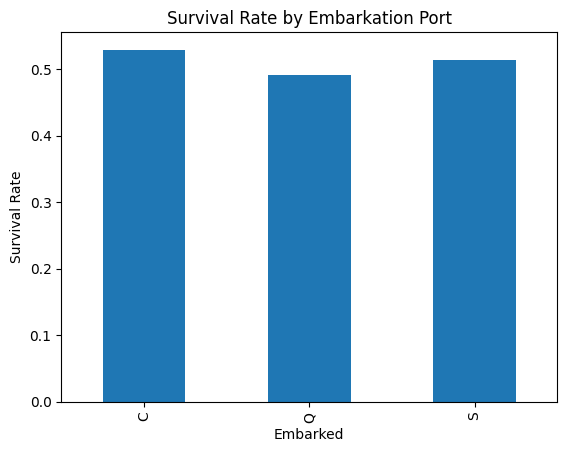

In [21]:
titanic.groupby("Embarked")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


/tmp/ipython-input-3961885848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["Pclass","AgeGroup"])["Survived"].mean().unstack().plot()


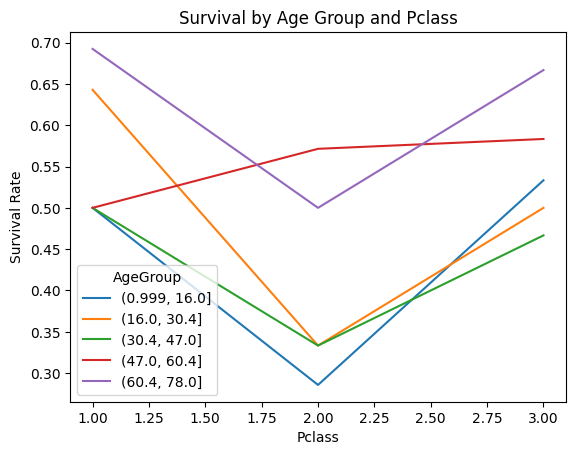

In [22]:
titanic["AgeGroup"] = pd.qcut(titanic["Age"], 5)
titanic.groupby(["Pclass","AgeGroup"])["Survived"].mean().unstack().plot()
plt.title("Survival by Age Group and Pclass")
plt.ylabel("Survival Rate")
plt.show()
